In [1]:
from sklearn import datasets
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

In [2]:
lfw_people=datasets.fetch_lfw_people(min_faces_per_person=70,data_home='datasets')


In [3]:
lfw_people.data.shape

(1217L, 2914L)

In [4]:
lfw_people.data

array([[  57.        ,   58.66666794,   62.33333206, ...,   23.        ,
          22.        ,   19.66666603],
       [  11.33333302,   12.        ,   15.        , ...,  122.        ,
         124.66666412,  136.33332825],
       [ 197.66667175,  183.66667175,  169.        , ...,  197.33332825,
         209.        ,  218.        ],
       ..., 
       [  67.        ,   71.33333588,   86.        , ...,  235.66667175,
         156.33332825,   41.33333206],
       [  49.33333206,   55.66666794,   76.66666412, ...,  186.        ,
         176.33332825,  161.        ],
       [  78.33333588,   80.        ,   90.33333588, ...,   46.66666794,
          47.66666794,   50.33333206]], dtype=float32)

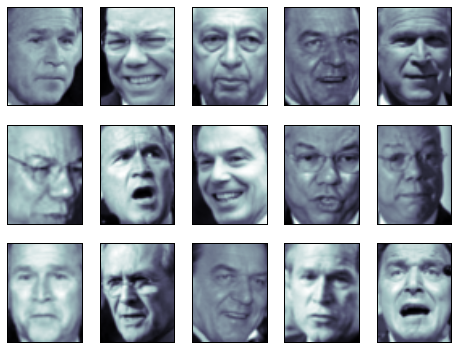

In [5]:
fig=plt.figure(figsize=(8,6))
for i in range(15):
    ax=fig.add_subplot(3,5,i+1,xticks=[],yticks=[])
    ax.imshow(lfw_people.images[i],cmap=plt.cm.bone)

In [6]:
from sklearn.cross_validation import train_test_split

In [7]:
X_train,X_test,y_train,y_test=train_test_split(lfw_people.data,lfw_people.target,random_state=12)

In [8]:
from sklearn import decomposition

In [9]:
pca=decomposition.RandomizedPCA(n_components=150,whiten=True)

In [10]:
pca.fit(X_train)

RandomizedPCA(copy=True, iterated_power=3, n_components=150,
       random_state=None, whiten=True)

In [11]:
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)
lfw_people.images[0].shape

(62L, 47L)

In [14]:
from sklearn.svm import SVR

In [30]:
from sklearn.grid_search import GridSearchCV
param_grid={'C':[0.001,0.01,0.1,1,10],'gamma':[0.001,0.01,0.1,1,10]}
grid=GridSearchCV(SVR(),param_grid=param_grid,verbose=3)

In [31]:
grid

GridSearchCV(cv=None, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [33]:
grid.fit(X_train_pca,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.001, gamma=0.001 ............................................
[CV] .................. C=0.001, gamma=0.001, score=-0.031338 -   0.4s
[CV] C=0.001, gamma=0.001 ............................................
[CV] .................. C=0.001, gamma=0.001, score=-0.073081 -   0.2s
[CV] C=0.001, gamma=0.001 ............................................
[CV] .................. C=0.001, gamma=0.001, score=-0.030200 -   0.2s
[CV] C=0.001, gamma=0.01 .............................................
[CV] ................... C=0.001, gamma=0.01, score=-0.031228 -   0.2s
[CV] C=0.001, gamma=0.01 .............................................
[CV] ................... C=0.001, gamma=0.01, score=-0.072922 -   0.2s
[CV] C=0.001, gamma=0.01 .............................................
[CV] ................... C=0.001, gamma=0.01, score=-0.030056 -   0.4s
[CV] C=0.001, gamma=0.1 ..............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done  31 tasks       | elapsed:   13.4s


[CV] .................... C=0.1, gamma=0.001, score=-0.012717 -   0.3s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.025488 -   0.5s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.035233 -   0.3s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.001850 -   0.3s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.037737 -   0.3s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ...................... C=0.1, gamma=0.1, score=-0.021850 -   0.3s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ...................... C=0.1, gamma=0.1, score=-0.061146 -   0.3s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   35.8s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [34]:
grid.best_params_

{'C': 10, 'gamma': 0.001}

In [35]:
clf=svm.SVC(C=10,gamma=0.001)
clf.fit(X_train_pca,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

C:\Users\kumarkul\Anaconda2\envs\gl-env\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\kumarkul\Anaconda2\envs\gl-env\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\kumarkul\Anaconda2\envs\gl-env\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it c

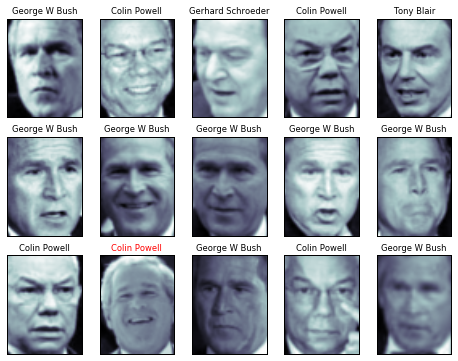

In [37]:
fig=plt.figure(figsize=(8,6))
for i in range(15):
    ax=fig.add_subplot(3,5,i+1,xticks=[],yticks=[])
    ax.imshow(X_test[i].reshape((62,47)),cmap=plt.cm.bone)
    y_pred=clf.predict(X_test_pca[i])[0]
    color = 'black' if y_pred ==y_test[i] else 'red'
    ax.set_title(lfw_people.target_names[y_pred],fontsize='small',color=color)
    